In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from graphic_utils import get_cluster_metrics, get_noml_metrics, get_ml_metrics, show_cluster_graphic, show_graphic, show_metric_per_cluster

In [86]:
with open('../../gpu_logs/new_porto.txt') as f:
    l = f.readlines()
    lines = [s for s in l if re.search(r'\w+', s)]
lines = lines[-39:]
lines

['Linear Regression\n',
 'Total Averaged RMSE: 0.441\n',
 'Total Averaged WAPE: 30.664\n',
 'Total Averaged R2: 0.793\n',
 'Total Averaged RMSE: 0.631\n',
 'Total Averaged WAPE: 50.245\n',
 'Total Averaged R2: 0.592\n',
 'Total Averaged RMSE: 0.477\n',
 'Total Averaged WAPE: 30.854\n',
 'Total Averaged R2: 0.76\n',
 'Total Averaged RMSE: 0.671\n',
 'Total Averaged WAPE: 52.042\n',
 'Total Averaged R2: 0.535\n',
 'XGBoost\n',
 'Total Averaged RMSE: 0.532\n',
 'Total Averaged WAPE: 30.492\n',
 'Total Averaged R2: 0.745\n',
 'Total Averaged RMSE: 0.703\n',
 'Total Averaged WAPE: 52.217\n',
 'Total Averaged R2: 0.536\n',
 'Total Averaged RMSE: 0.397\n',
 'Total Averaged WAPE: 20.857\n',
 'Total Averaged R2: 0.851\n',
 'Total Averaged RMSE: 0.417\n',
 'Total Averaged WAPE: 25.347\n',
 'Total Averaged R2: 0.832\n',
 'Random Forest\n',
 'Total Averaged RMSE: 0.557\n',
 'Total Averaged WAPE: 30.276\n',
 'Total Averaged R2: 0.719\n',
 'Total Averaged RMSE: 0.731\n',
 'Total Averaged WAPE: 52.78

In [87]:
with open('../../gpu_logs/no_ml_porto.txt') as f:
    l = f.readlines()
    lines_noml = [s for s in l if re.search(r'\w+', s)]
lines_noml = lines_noml[1:9]
lines_noml

['Baseline\n',
 'RMSE: 0.4714\n',
 'WAPE: 0.3078\n',
 'R2: 0.7108\n',
 'Baseline - Previous Day\n',
 'Baseline\n',
 'RMSE: 0.805\n',
 'WAPE: 0.6385\n']

In [88]:
def get_metrics_from_lines(lines):
    model_names = [lines[0][:-1],lines[13][:-1],lines[26][:-1]]
    rmse = [lines[1].split(":")[1][:-1],lines[14].split(":")[1][:-1],lines[27].split(":")[1][:-1]]
    wape = [lines[2].split(":")[1][:-1],lines[15].split(":")[1][:-1],lines[28].split(":")[1][:-1]]
    r2 = [lines[3].split(":")[1][:-1],lines[16].split(":")[1][:-1],lines[29].split(":")[1][:-1]]
    rmse = list(map(float, rmse))
    wape = list(map(float, wape))
    wape = list(map(lambda x: x/100, wape))
    r2 = list(map(float, r2))
    return model_names,rmse,wape,r2

In [97]:
def get_metrics_from_lines(lines):
    model_names = [lines[0][:-1],lines[13][:-1],lines[26][:-1]]
    rmse = [lines[4].split(":")[1][:-1],lines[17].split(":")[1][:-1],lines[30].split(":")[1][:-1]]
    wape = [lines[5].split(":")[1][:-1],lines[18].split(":")[1][:-1],lines[31].split(":")[1][:-1]]
    r2 = [lines[6].split(":")[1][:-1],lines[19].split(":")[1][:-1],lines[32].split(":")[1][:-1]]
    rmse = list(map(float, rmse))
    wape = list(map(float, wape))
    wape = list(map(lambda x: x/100, wape))
    r2 = list(map(float, r2))
    return model_names,rmse,wape,r2

In [100]:
def get_metrics_from_lines(lines):
    model_names = [lines[0][:-1],lines[13][:-1],lines[26][:-1]]
    rmse = [lines[7].split(":")[1][:-1],lines[20].split(":")[1][:-1],lines[33].split(":")[1][:-1]]
    wape = [lines[8].split(":")[1][:-1],lines[21].split(":")[1][:-1],lines[34].split(":")[1][:-1]]
    r2 = [lines[9].split(":")[1][:-1],lines[22].split(":")[1][:-1],lines[35].split(":")[1][:-1]]
    rmse = list(map(float, rmse))
    wape = list(map(float, wape))
    wape = list(map(lambda x: x/100, wape))
    r2 = list(map(float, r2))
    return model_names,rmse,wape,r2

In [103]:
def get_metrics_from_lines(lines):
    model_names = [lines[0][:-1],lines[13][:-1],lines[26][:-1]]
    rmse = [lines[10].split(":")[1][:-1],lines[23].split(":")[1][:-1],lines[36].split(":")[1][:-1]]
    wape = [lines[11].split(":")[1][:-1],lines[24].split(":")[1][:-1],lines[37].split(":")[1][:-1]]
    r2 = [lines[12].split(":")[1][:-1],lines[25].split(":")[1][:-1],lines[38].split(":")[1][:-1]]
    rmse = list(map(float, rmse))
    wape = list(map(float, wape))
    wape = list(map(lambda x: x/100, wape))
    r2 = list(map(float, r2))
    return model_names,rmse,wape,r2

In [104]:
def show_graphic_here(lines, filename):
    model_names, rmse, wape, r2 = get_metrics_from_lines(lines)
    no_ml, rmse_no, wape_no, r2_no = get_noml_metrics(lines_noml)
    model_names.insert(0,'Baseline')
    rmse.insert(0,rmse_no[0])
    wape.insert(0,wape_no[0])
    r2.insert(0,r2_no[0])
    X_names = ['RMSE', 'WAPE', 'R2']
    X_axis = np.arange(len(X_names))
    pos = 0
    bar_width = 0.15
    fig, ax = plt.subplots(figsize=(6,4))

    for i in range(len(model_names)):
        bar = (rmse[i], wape[i], r2[i])
        b = ax.bar(X_axis + pos, bar, bar_width-0.01, label=model_names[i])
        pos = pos + bar_width
        ax.bar_label(b, fontsize=6, fmt='%.3f')
        
    ax.set_ylim(0,1)
    ax.set_xticks(X_axis+bar_width+bar_width/2,X_names)
    #ax.set_xlabel("Metrics")
    ax.set_ylabel("Performance")
    #ax.set_title(title)
    ax.legend(loc='upper center')
    plt.savefig(filename)
    plt.show()

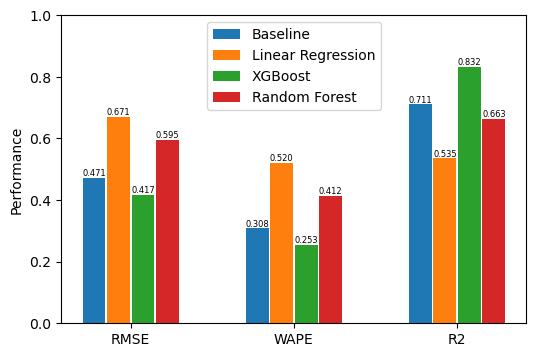

In [105]:
show_graphic_here(lines, "../../images/main/_.png")

In [ ]:
model_names, mse, wape, r2, number_clust = get_cluster_metrics(lines)

In [ ]:
for j in range(len(set(model_names))):
    for i in range(0,3):
        if i == 0:
            show_metric_per_cluster(mse[j::3], "MSE", number_clust, "MSE per Number of Clusters in {}".format(model_names[j]), "../../images/clusters/_loureiro_mse_{}".format(model_names[j]))
        elif i == 1:
            show_metric_per_cluster(wape[j::3], "WAPE", number_clust, "WAPE per Number of Clusters in {}".format(model_names[j]), "../../images/clusters/_loureiro_wape_{}".format(model_names[j]))
        else:
            show_metric_per_cluster(r2[j::3], "R2 Score", number_clust, "R2 per Number of Clusters in {}".format(model_names[j]), "../../images/clusters/_loureiro_r2_{}".format(model_names[j]))

In [ ]:
with open('gpu_logs/no_ml.txt') as f:
    lines_noml = f.readlines()
lines_noml = lines_noml[1:9]
lines_noml

In [ ]:
with open('gpu_logs/porto_best_params_selected_features.txt') as f:
    lines = f.readlines()
lines = lines[-14:]
lines

In [ ]:
show_graphic(lines, lines_noml, "Energy Prediction comparison with final selected features and XGBoost Hyper Tuned (Porto)", "images/porto_xgboost_hyp.png")